In [1]:
import shutil
import os

# Replace with your actual dataset path
original_path = "/kaggle/input/ecg-analysis/ECG_DATA"
writable_path = "/kaggle/working/ECG_DATA"

# Copy the dataset to a writable directory
shutil.copytree(original_path, writable_path)
print("✅ Dataset copied to working directory.")

✅ Dataset copied to working directory.


In [2]:
from pathlib import Path
import random

base_dir = Path('/kaggle/working/ECG_DATA')
train_dir = base_dir / 'train'
val_dir = base_dir / 'val'

os.makedirs(val_dir, exist_ok=True)
class_names = os.listdir(train_dir)

for class_name in class_names:
    os.makedirs(val_dir / class_name, exist_ok=True)

split_ratio = 0.15

for class_name in class_names:
    class_path = train_dir / class_name
    images = os.listdir(class_path)
    random.shuffle(images)

    split_count = int(len(images) * split_ratio)
    val_images = images[:split_count]

    for img in val_images:
        src_path = class_path / img
        dst_path = val_dir / class_name / img
        shutil.move(src_path, dst_path)

print("✅ Validation set created successfully in writable directory.")

✅ Validation set created successfully in writable directory.


In [3]:
from pathlib import Path

def count_images_per_class(root_dir):
    root = Path(root_dir)
    print(f"📁 Folder: {root.name}")
    for class_dir in sorted(root.iterdir()):
        if class_dir.is_dir():
            count = len(list(class_dir.glob('*')))
            print(f"  - {class_dir.name}: {count} images")

# Count images in train, val, and test
count_images_per_class("/kaggle/working/ECG_DATA/train")
count_images_per_class("/kaggle/working/ECG_DATA/val")
count_images_per_class("/kaggle/working/ECG_DATA/test")

📁 Folder: train
  - ECG Images of Myocardial Infarction Patients (240x12=2880): 813 images
  - ECG Images of Patient that have History of MI (172x12=2064): 439 images
  - ECG Images of Patient that have abnormal heartbeat (233x12=2796): 595 images
  - Normal Person ECG Images (284x12=3408): 725 images
📁 Folder: val
  - ECG Images of Myocardial Infarction Patients (240x12=2880): 143 images
  - ECG Images of Patient that have History of MI (172x12=2064): 77 images
  - ECG Images of Patient that have abnormal heartbeat (233x12=2796): 104 images
  - Normal Person ECG Images (284x12=3408): 127 images
📁 Folder: test
  - ECG Images of Myocardial Infarction Patients (240x12=2880): 239 images
  - ECG Images of Patient that have History of MI (172x12=2064): 172 images
  - ECG Images of Patient that have abnormal heartbeat (233x12=2796): 233 images
  - Normal Person ECG Images (284x12=3408): 284 images


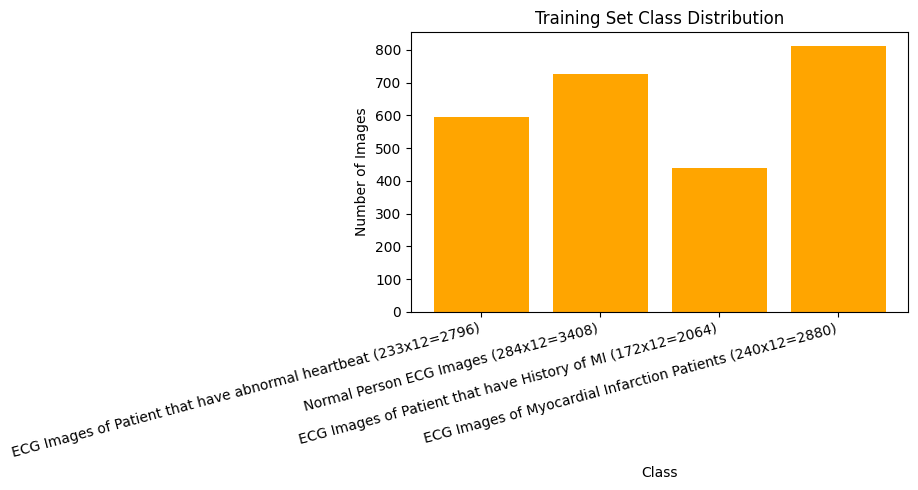

In [4]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Set your train folder path
train_path = Path("/kaggle/working/ECG_DATA/train")

# Count images in each class
class_counts = {cls.name: len(list(cls.glob("*"))) for cls in train_path.iterdir() if cls.is_dir()}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

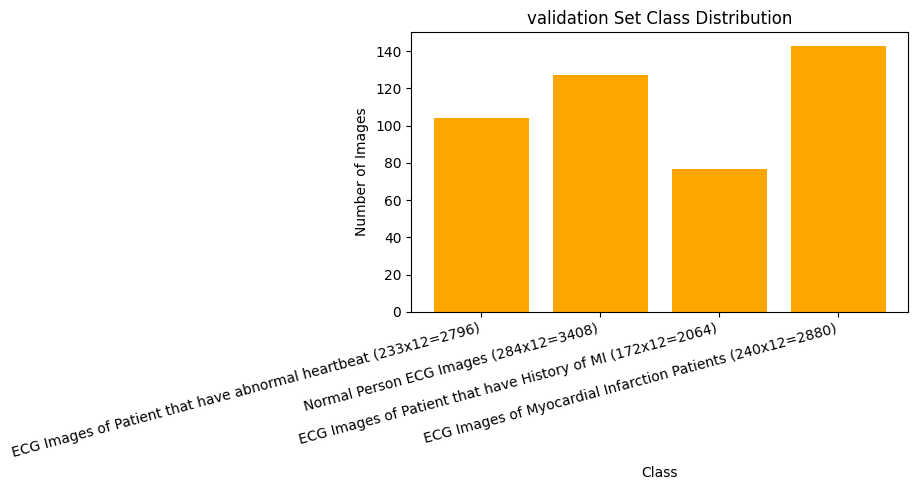

In [5]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Set your train folder path
train_path = Path("/kaggle/working/ECG_DATA/val")

# Count images in each class
class_counts = {cls.name: len(list(cls.glob("*"))) for cls in train_path.iterdir() if cls.is_dir()}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("validation Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

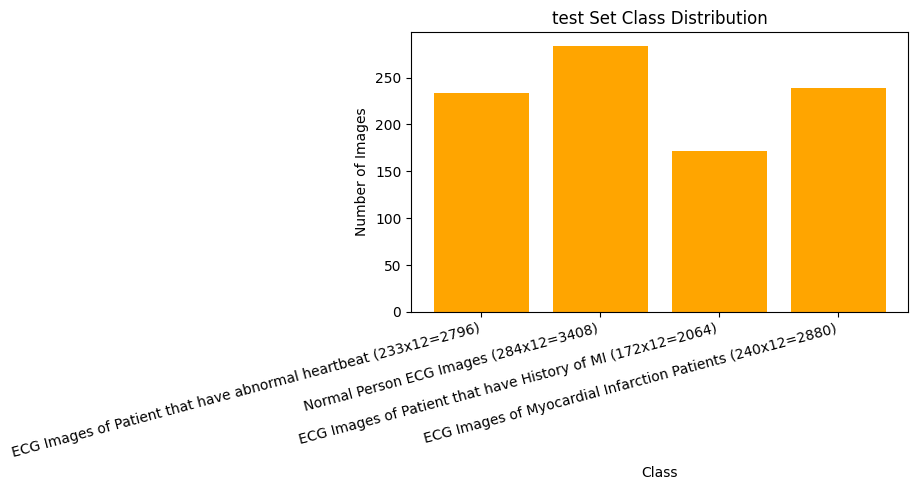

In [6]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Set your train folder path
train_path = Path("/kaggle/working/ECG_DATA/test")

# Count images in each class
class_counts = {cls.name: len(list(cls.glob("*"))) for cls in train_path.iterdir() if cls.is_dir()}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("test Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

In [4]:
from torchvision import transforms

# ✅ Augmentation pipeline for training set
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),               # simulate zoom
    #transforms.RandomHorizontalFlip(),               # horizontal shift
    transforms.RandomRotation(10),                   # slight tilt
    transforms.ColorJitter(brightness=0.1, contrast=0.1),  # optional: ECG brightness/contrast
    transforms.ToTensor(),                           # convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406],       # ImageNet mean
                         [0.229, 0.224, 0.225])       # ImageNet std
])

# ✅ Simpler transform for validation and test sets (no augmentation)
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [5]:
from torchvision import datasets

train_dataset = datasets.ImageFolder('/kaggle/working/ECG_DATA/train', transform=train_transforms)
val_dataset = datasets.ImageFolder('/kaggle/working/ECG_DATA/val', transform=val_test_transforms)
test_dataset = datasets.ImageFolder('/kaggle/working/ECG_DATA/test', transform=val_test_transforms)

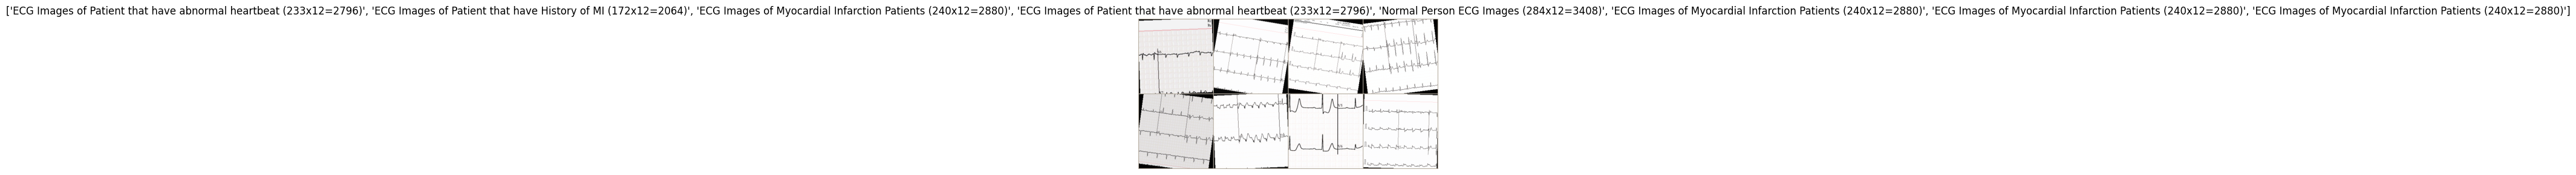

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

# Helper function to reverse normalization for display
def imshow(img_tensor, title=None):
    img = img_tensor.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

# Load one batch with augmentation applied
from torch.utils.data import DataLoader

train_loader_vis = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Get a single batch
images, labels = next(iter(train_loader_vis))
class_names = train_dataset.classes

# Show the grid of images
grid = make_grid(images, nrow=4, pad_value=1)
imshow(grid, title=[class_names[l] for l in labels])

# resnet50

In [10]:
from torchvision.models import resnet50, ResNet50_Weights
import torch
import torch.nn as nn

# Use pre-downloaded weights or skip if internet is blocked
weights = None  # ← Avoids download attempt
model = resnet50(weights=weights)

# Custom classifier head
model.fc = nn.Sequential(
    nn.Linear(2048, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 4)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [11]:
import torch.nn as nn
import torch.optim as optim

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

In [12]:
from torchvision import datasets
from torch.utils.data import DataLoader

# Dataset paths
train_path = "/kaggle/working/ECG_DATA/train"
val_path   = "/kaggle/working/ECG_DATA/val"
test_path  = "/kaggle/working/ECG_DATA/test"

# Load datasets
train_dataset = datasets.ImageFolder(train_path, transform=train_transforms)
val_dataset   = datasets.ImageFolder(val_path, transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(test_path, transform=val_test_transforms)

# Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [13]:
from tqdm import tqdm

epochs = 50
train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    scheduler.step()

    print(f"Epoch {epoch+1}/{epochs} | Train Acc: {epoch_acc:.4f} | Val Acc: {val_acc:.4f}")

Epoch 1/50 | Train Acc: 0.2990 | Val Acc: 0.3193


Epoch 2/50 | Train Acc: 0.3729 | Val Acc: 0.4545


Epoch 3/50 | Train Acc: 0.3872 | Val Acc: 0.3969


Epoch 4/50 | Train Acc: 0.4331 | Val Acc: 0.4945


Epoch 5/50 | Train Acc: 0.4475 | Val Acc: 0.4169


Epoch 6/50 | Train Acc: 0.4510 | Val Acc: 0.5410


Epoch 7/50 | Train Acc: 0.4635 | Val Acc: 0.4856


Epoch 8/50 | Train Acc: 0.4502 | Val Acc: 0.5011


Epoch 9/50 | Train Acc: 0.4743 | Val Acc: 0.5100


Epoch 10/50 | Train Acc: 0.4771 | Val Acc: 0.5432


Epoch 11/50 | Train Acc: 0.4778 | Val Acc: 0.5898


Epoch 12/50 | Train Acc: 0.4907 | Val Acc: 0.6208


Epoch 13/50 | Train Acc: 0.5062 | Val Acc: 0.5499


Epoch 14/50 | Train Acc: 0.5093 | Val Acc: 0.5698


Epoch 15/50 | Train Acc: 0.5163 | Val Acc: 0.5521


Epoch 16/50 | Train Acc: 0.5245 | Val Acc: 0.5809


Epoch 17/50 | Train Acc: 0.5459 | Val Acc: 0.6519


Epoch 18/50 | Train Acc: 0.5474 | Val Acc: 0.5920


Epoch 19/50 | Train Acc: 0.5404 | Val Acc: 0.5787


Epoch 20/50 | Train Acc: 0.5490 | Val Acc: 0.6253


Epoch 21/50 | Train Acc: 0.5708 | Val Acc: 0.6430


Epoch 22/50 | Train Acc: 0.5630 | Val Acc: 0.6053


Epoch 23/50 | Train Acc: 0.5735 | Val Acc: 0.6475


Epoch 24/50 | Train Acc: 0.5793 | Val Acc: 0.6652


Epoch 25/50 | Train Acc: 0.5677 | Val Acc: 0.6208


Epoch 26/50 | Train Acc: 0.5774 | Val Acc: 0.6718


Epoch 27/50 | Train Acc: 0.5968 | Val Acc: 0.6718


Epoch 28/50 | Train Acc: 0.5828 | Val Acc: 0.6563


Epoch 29/50 | Train Acc: 0.5712 | Val Acc: 0.6763


Epoch 30/50 | Train Acc: 0.5848 | Val Acc: 0.7007


Epoch 31/50 | Train Acc: 0.5828 | Val Acc: 0.6851


Epoch 32/50 | Train Acc: 0.6143 | Val Acc: 0.6652


Epoch 33/50 | Train Acc: 0.6007 | Val Acc: 0.6563


Epoch 34/50 | Train Acc: 0.5816 | Val Acc: 0.6585


Epoch 35/50 | Train Acc: 0.6038 | Val Acc: 0.6608


Epoch 36/50 | Train Acc: 0.6054 | Val Acc: 0.6519


Epoch 37/50 | Train Acc: 0.6089 | Val Acc: 0.6497


Epoch 38/50 | Train Acc: 0.6007 | Val Acc: 0.6430


Epoch 39/50 | Train Acc: 0.6065 | Val Acc: 0.6608


Epoch 40/50 | Train Acc: 0.6069 | Val Acc: 0.6741


Epoch 41/50 | Train Acc: 0.6038 | Val Acc: 0.6718


Epoch 42/50 | Train Acc: 0.6108 | Val Acc: 0.6563


Epoch 43/50 | Train Acc: 0.6019 | Val Acc: 0.6386


Epoch 44/50 | Train Acc: 0.5933 | Val Acc: 0.6763


Epoch 45/50 | Train Acc: 0.6104 | Val Acc: 0.6763


Epoch 46/50 | Train Acc: 0.6128 | Val Acc: 0.6630


Epoch 47/50 | Train Acc: 0.6011 | Val Acc: 0.6452


Epoch 48/50 | Train Acc: 0.6054 | Val Acc: 0.6541


Epoch 49/50 | Train Acc: 0.6077 | Val Acc: 0.6585


Epoch 50/50 | Train Acc: 0.5933 | Val Acc: 0.6718


In [14]:
model.eval()  # Set model to evaluation mode

test_loss, test_correct, total = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        test_correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = test_correct / total
test_loss /= total

print(f"\n✅ Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 0.6810 | Test Loss: 0.8103


<Figure size 600x500 with 0 Axes>

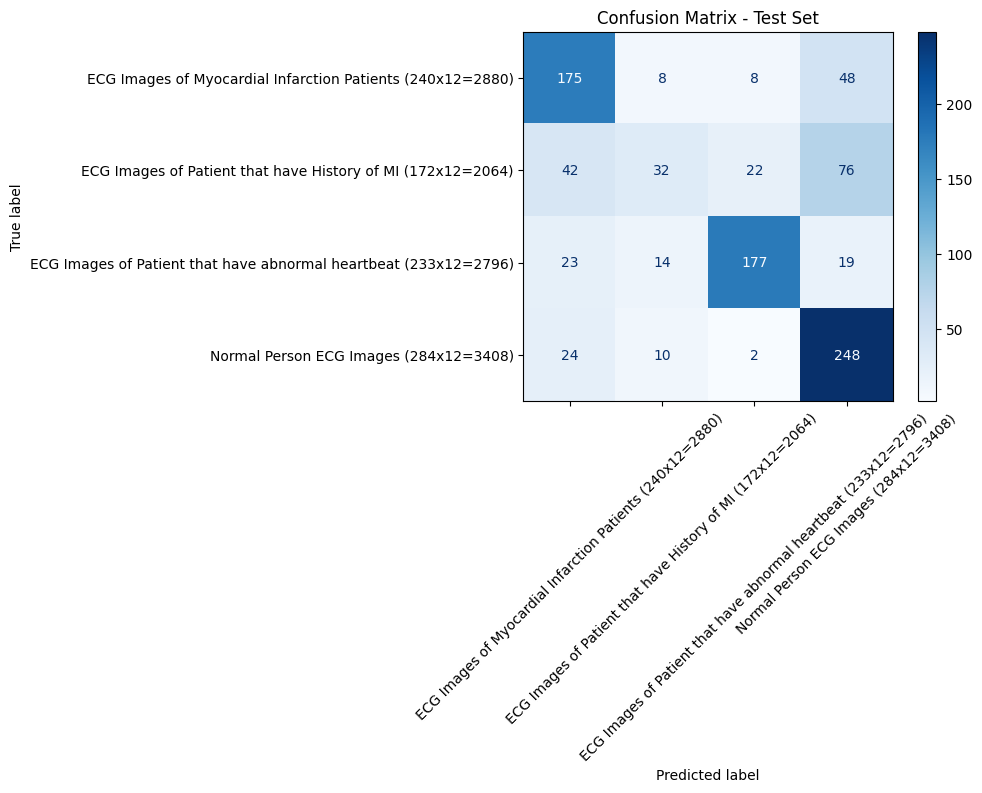

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)
class_names = test_dataset.classes  # e.g., ['MI', 'History', 'Abnormal', 'Normal']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Test Set")
plt.show()


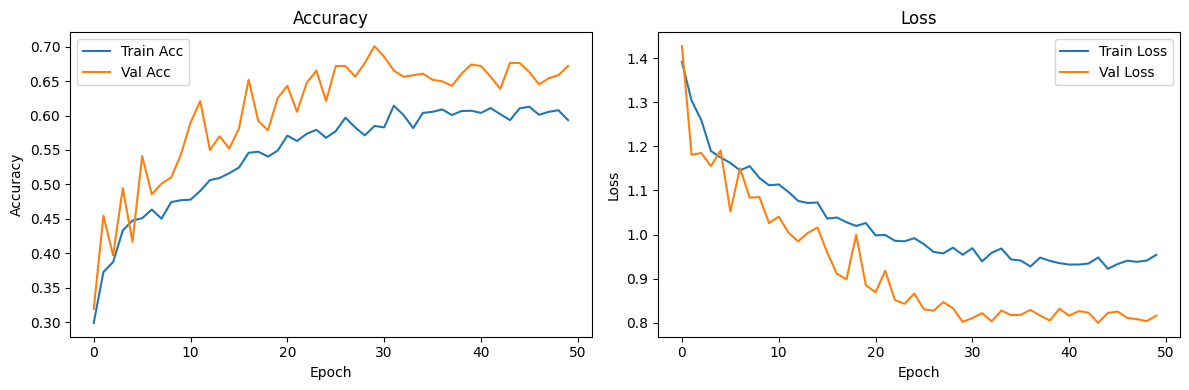

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


# Resnet with CBAM

In [7]:
import torch.nn as nn
import torch

# Channel Attention
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.shared = nn.Sequential(
            nn.Conv2d(in_planes, in_planes // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_planes // reduction, in_planes, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg = self.shared(self.avg_pool(x))
        max_ = self.shared(self.max_pool(x))
        return self.sigmoid(avg + max_)

# Spatial Attention
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=kernel_size, padding=kernel_size // 2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg = torch.mean(x, dim=1, keepdim=True)
        max_, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg, max_], dim=1)
        return self.sigmoid(self.conv(x_cat))

# Full CBAM
class CBAM(nn.Module):
    def __init__(self, in_planes, reduction=16, kernel_size=7):
        super().__init__()
        self.ca = ChannelAttention(in_planes, reduction)
        self.sa = SpatialAttention(kernel_size)

    def forward(self, x):
        x = x * self.ca(x)
        x = x * self.sa(x)
        return x


In [8]:
from torchvision.models import resnet50, ResNet50_Weights

class ResNet50_CBAM(nn.Module):
    def __init__(self, num_classes=4, pretrained=False):
        super(ResNet50_CBAM, self).__init__()
        # Load base ResNet50
        weights = ResNet50_Weights.DEFAULT if pretrained else None
        base = resnet50(weights=weights)

        # Keep all blocks
        self.stem = nn.Sequential(base.conv1, base.bn1, base.relu, base.maxpool)
        self.layer1 = base.layer1
        self.layer2 = base.layer2
        self.layer3 = base.layer3
        self.layer4 = base.layer4

        # Insert CBAM after layer4
        self.cbam = CBAM(in_planes=2048)

        # Global pooling and classification head
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.cbam(x)           # 👈 attention added here
        x = self.pool(x)
        x = self.classifier(x)
        return x


In [9]:
model = ResNet50_CBAM(pretrained=False)  # Kaggle = offline → no weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [24]:
from tqdm import tqdm

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Tracking lists
epochs = 10
train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

    # Epoch summary
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    # --- Validation ---
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    scheduler.step()

    print(f"Epoch {epoch+1}/{epochs} | Train Acc: {epoch_acc:.4f} | Val Acc: {val_acc:.4f}")


Epoch 1/10 | Train Acc: 0.3219 | Val Acc: 0.3171


Epoch 2/10 | Train Acc: 0.3386 | Val Acc: 0.3703


Epoch 3/10 | Train Acc: 0.3981 | Val Acc: 0.3171


Epoch 4/10 | Train Acc: 0.4226 | Val Acc: 0.4279


Epoch 5/10 | Train Acc: 0.4335 | Val Acc: 0.3459


Epoch 6/10 | Train Acc: 0.4432 | Val Acc: 0.5122


Epoch 7/10 | Train Acc: 0.4677 | Val Acc: 0.4368


Epoch 8/10 | Train Acc: 0.4607 | Val Acc: 0.3193


Epoch 9/10 | Train Acc: 0.4751 | Val Acc: 0.3282


Epoch 10/10 | Train Acc: 0.4833 | Val Acc: 0.4545


In [25]:
model.eval()  # Set model to evaluation mode

test_loss, test_correct, total = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        test_correct += (preds == labels).sum().item()
        total += labels.size(0)

# Final metrics
test_acc = test_correct / total
test_loss /= total

print(f"\n✅ Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")



✅ Test Accuracy: 0.4386 | Test Loss: 1.1854


<Figure size 600x500 with 0 Axes>

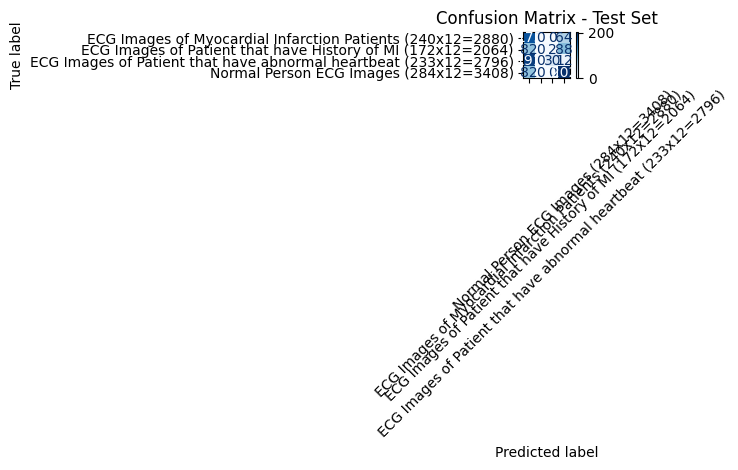

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get class names from dataset
class_names = test_dataset.classes  # Assumes you used ImageFolder

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.show()

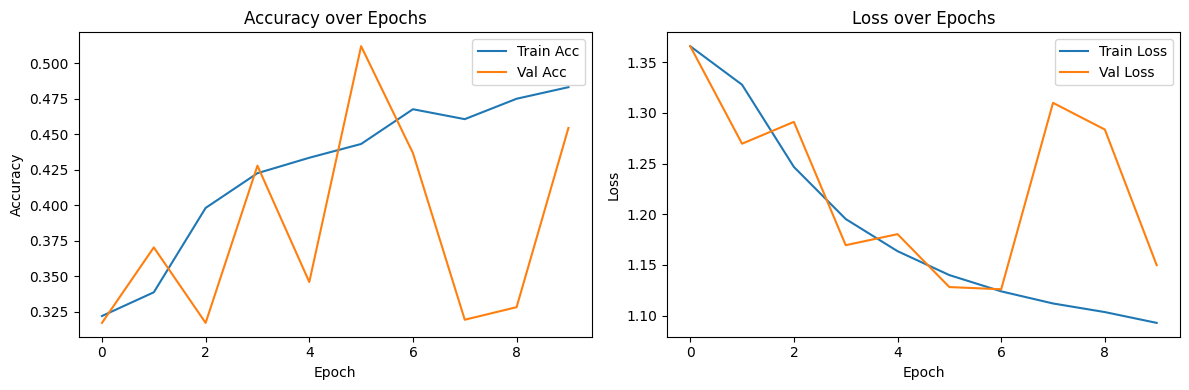

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


# Fine-Tune ResNet’s Layer4 + Use Label Smoothing

In [10]:
from torchvision import transforms

# ImageNet normalization
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD  = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD)
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD)
])

In [12]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Update paths based on your dataset
train_path = "/kaggle/working/ECG_DATA/train"
val_path   = "/kaggle/working/ECG_DATA/val"
test_path  = "/kaggle/working/ECG_DATA/test"

# Load datasets
train_dataset = ImageFolder(train_path, transform=train_transforms)
val_dataset   = ImageFolder(val_path, transform=val_test_transforms)
test_dataset  = ImageFolder(test_path, transform=val_test_transforms)

# Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# --- Step 1: Define the CBAM Module ---

class ChannelAttention(nn.Module):
    def __init__(self, in_planes, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.shared = nn.Sequential(
            nn.Conv2d(in_planes, in_planes // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_planes // reduction, in_planes, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.shared(self.avg_pool(x)) + self.shared(self.max_pool(x)))

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=kernel_size, padding=kernel_size // 2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg_out, max_out], dim=1)
        return self.sigmoid(self.conv(x_cat))

class CBAM(nn.Module):
    def __init__(self, in_planes, reduction=16, kernel_size=7):
        super().__init__()
        self.ca = ChannelAttention(in_planes, reduction)
        self.sa = SpatialAttention(kernel_size)

    def forward(self, x):
        x = x * self.ca(x)
        x = x * self.sa(x)
        return x

# --- Step 2: Custom ResNet50 + CBAM Model ---

from torchvision.models import resnet50

class ResNet50_CBAM(nn.Module):
    def __init__(self, num_classes=4, pretrained=False):
        super().__init__()
        base = resnet50(weights=None)  # Offline mode: no pretrained download

        self.stem = nn.Sequential(base.conv1, base.bn1, base.relu, base.maxpool)
        self.layer1 = base.layer1
        self.layer2 = base.layer2
        self.layer3 = base.layer3
        self.layer4 = base.layer4
        self.cbam = CBAM(2048)

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.cbam(x)
        x = self.pool(x)
        x = self.classifier(x)
        return x

# --- Step 3: Initialize Model, Device, and Fine-Tune Layer4 ---

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50_CBAM().to(device)

# Only fine-tune layer4 and classifier
for name, param in model.named_parameters():
    if "layer4" in name or "classifier" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# --- Step 4: Loss Function with Label Smoothing ---
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# --- Step 5: Optimizer and LR Scheduler ---
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# --- Step 6: Training Loop ---
epochs = 50
train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    scheduler.step()

    print(f"Epoch {epoch+1}/{epochs} | Train Acc: {epoch_acc:.4f} | Val Acc: {val_acc:.4f}")


Epoch 1/50 | Train Acc: 0.3239 | Val Acc: 0.3171


Epoch 2/50 | Train Acc: 0.4117 | Val Acc: 0.4590


Epoch 3/50 | Train Acc: 0.4370 | Val Acc: 0.4346


Epoch 4/50 | Train Acc: 0.4658 | Val Acc: 0.5588


Epoch 5/50 | Train Acc: 0.5082 | Val Acc: 0.4812


Epoch 6/50 | Train Acc: 0.5435 | Val Acc: 0.6585


Epoch 7/50 | Train Acc: 0.5533 | Val Acc: 0.6984


Epoch 8/50 | Train Acc: 0.5665 | Val Acc: 0.7494


Epoch 9/50 | Train Acc: 0.5731 | Val Acc: 0.6896


Epoch 10/50 | Train Acc: 0.5875 | Val Acc: 0.7361


Epoch 11/50 | Train Acc: 0.5929 | Val Acc: 0.7406


Epoch 12/50 | Train Acc: 0.5937 | Val Acc: 0.7561


Epoch 13/50 | Train Acc: 0.6100 | Val Acc: 0.7539


Epoch 14/50 | Train Acc: 0.6081 | Val Acc: 0.7694


Epoch 15/50 | Train Acc: 0.6209 | Val Acc: 0.7738


Epoch 16/50 | Train Acc: 0.6159 | Val Acc: 0.7650


Epoch 17/50 | Train Acc: 0.6151 | Val Acc: 0.7450


Epoch 18/50 | Train Acc: 0.6233 | Val Acc: 0.7627


Epoch 19/50 | Train Acc: 0.6322 | Val Acc: 0.7916


Epoch 20/50 | Train Acc: 0.6326 | Val Acc: 0.7894


Epoch 21/50 | Train Acc: 0.6334 | Val Acc: 0.7894


Epoch 22/50 | Train Acc: 0.6330 | Val Acc: 0.7871


Epoch 23/50 | Train Acc: 0.6236 | Val Acc: 0.7738


Epoch 24/50 | Train Acc: 0.6322 | Val Acc: 0.7783


Epoch 25/50 | Train Acc: 0.6404 | Val Acc: 0.7827


Epoch 26/50 | Train Acc: 0.6392 | Val Acc: 0.7916


Epoch 27/50 | Train Acc: 0.6302 | Val Acc: 0.7938


Epoch 28/50 | Train Acc: 0.6435 | Val Acc: 0.7894


Epoch 29/50 | Train Acc: 0.6392 | Val Acc: 0.7871


Epoch 30/50 | Train Acc: 0.6431 | Val Acc: 0.7783


Epoch 31/50 | Train Acc: 0.6376 | Val Acc: 0.7871


Epoch 32/50 | Train Acc: 0.6369 | Val Acc: 0.7916


Epoch 33/50 | Train Acc: 0.6524 | Val Acc: 0.7960


Epoch 34/50 | Train Acc: 0.6372 | Val Acc: 0.8093


Epoch 35/50 | Train Acc: 0.6520 | Val Acc: 0.7894


Epoch 36/50 | Train Acc: 0.6365 | Val Acc: 0.7982


Epoch 37/50 | Train Acc: 0.6404 | Val Acc: 0.7960


Epoch 38/50 | Train Acc: 0.6454 | Val Acc: 0.7938


Epoch 39/50 | Train Acc: 0.6349 | Val Acc: 0.8027


Epoch 40/50 | Train Acc: 0.6551 | Val Acc: 0.7849


Epoch 41/50 | Train Acc: 0.6489 | Val Acc: 0.7960


Epoch 42/50 | Train Acc: 0.6516 | Val Acc: 0.7960


Epoch 43/50 | Train Acc: 0.6660 | Val Acc: 0.8004


Epoch 44/50 | Train Acc: 0.6446 | Val Acc: 0.7960


Epoch 45/50 | Train Acc: 0.6466 | Val Acc: 0.7960


Epoch 46/50 | Train Acc: 0.6423 | Val Acc: 0.8071


Epoch 47/50 | Train Acc: 0.6435 | Val Acc: 0.8004


Epoch 48/50 | Train Acc: 0.6493 | Val Acc: 0.8115


Epoch 49/50 | Train Acc: 0.6512 | Val Acc: 0.7871


Epoch 50/50 | Train Acc: 0.6462 | Val Acc: 0.8027


In [14]:
model.eval()  # Set model to evaluation mode

test_loss, test_correct, total = 0.0, 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        test_correct += (preds == labels).sum().item()
        total += labels.size(0)

# Final metrics
test_acc = test_correct / total
test_loss /= total

print(f"\n✅ Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 0.7985 | Test Loss: 0.7264


<Figure size 600x500 with 0 Axes>

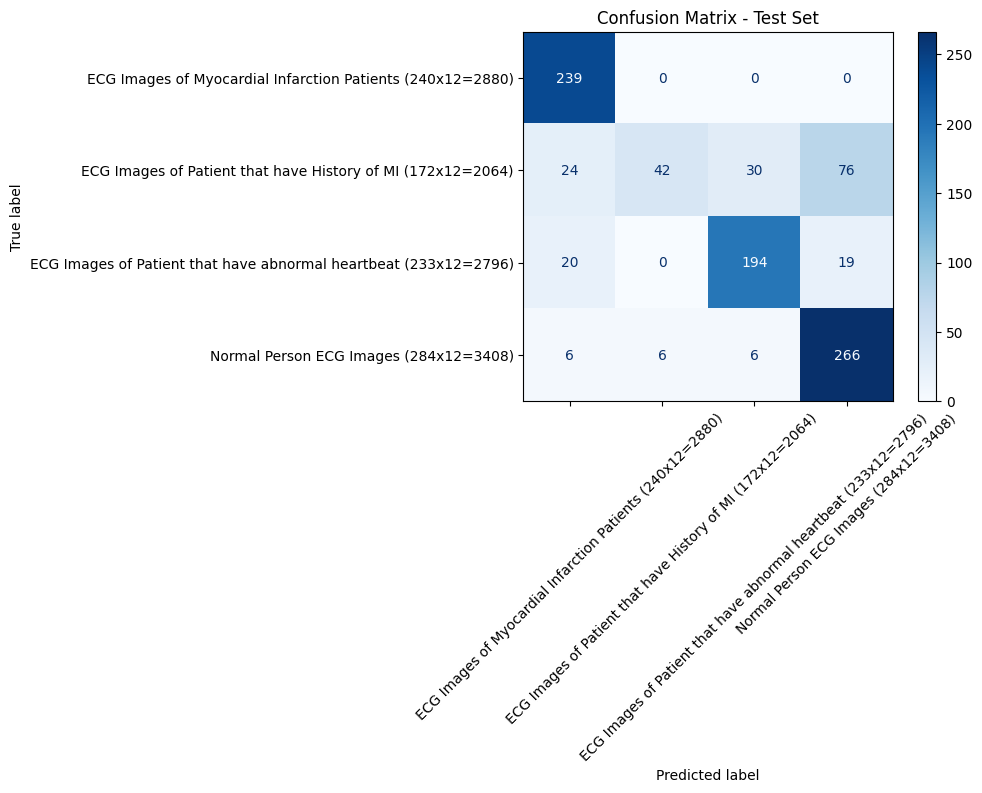

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)
class_names = test_dataset.classes  # e.g., ['MI', 'History', 'Abnormal', 'Normal']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Test Set")
plt.show()

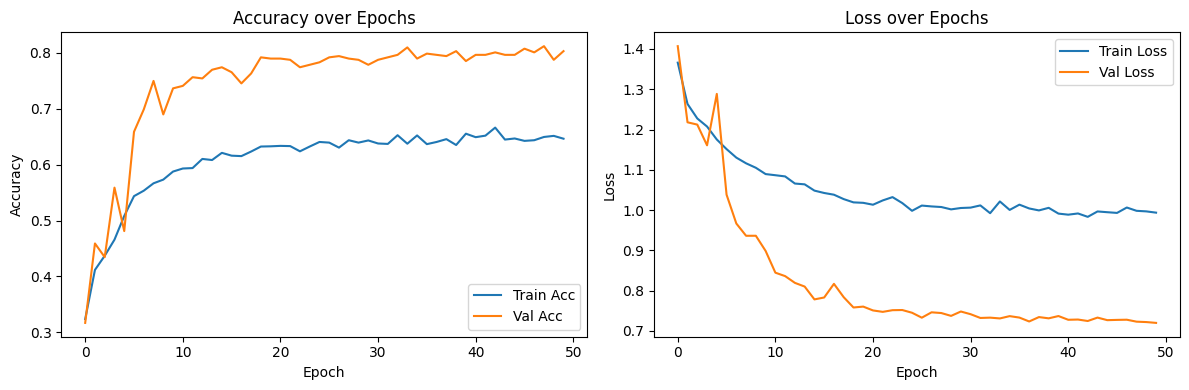

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()